___
## Ciência dos Dados - PROJETO 3 - INSPER

___
#### Freddy Dratwa

#### Victor Vazquez

#### Michel Haggiag

#### Allan Singer

#### Ricardo Ferraro

___

# Estudo do preço do carro

___

## A. INTRODUÇÃO

## https://www.kaggle.com/jpayne/852k-used-car-listings
## https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

O objetivo deste projeto é chegar ao melhor modelo possível que seja capaz de prever o preço de um carro usado nos EUA a partir das características presentes no dataset:
    <br>- Preço;<br>
    - Ano;<br>
    - Quilometragem;<br>
    - Cidade;<br>
    - Estado;<br>
    - Marca;<br>
    - Modelo;<br>
    - Número de Chassis.<br>

A base de dados possui 1.2 milhão de carros com data de produção entre os anos 1997 a 2018 de 58 marcas diferentes, sendo estes 2914 modelos distintos com o preço mÍnimo de US1.500,00 e máximo de US462.000,00 , com a mínima quilometragem 8 Km e a máxima 2.286.260,8 Km.<br>

Como uma primeira previsão, imagina-se que algumas das características do dataset influenciam mais no preço do carro do que outras. Por exemplo, é de se esperar que um carro comprado há mais tempo tenha seu preço menor atualmente. Ou seja, a variavel "Ano", que representa o ano em que o carro foi fabricado, deve influenciar muito no preço do veículo, bem como a quilometragem, onde um carro que foi comprado mas usado pouco deve permanecer mais barato do que um usado muitas vezes.<br>



___
## B. MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

### BASE DE DADOS

**Limpando e tratando dataset**

Nas células abaixo, o dataset é limpo e reorganiazdo. Para se fazer isso, a coluna "Chassi" é removoida, pois esta é uma característica individual para cada veículo e não influencia no preço final do mesmo, acompanhada da variáveç "Estado", que é retirada pois a localização onde o carro é usado não altera seu preço após um certo período de tempo. Alem disso, duas colunas vazias foram reitradas. Então, a variável milhagem foi transformada em quilometragem, multplicando seu valor por 1.6. Por último, a variavel ano foi transformada em idade, ou seja, a diferença do ano atual (2019) para o ano em que o carro foi vendido. 

In [2]:
dataset = pd.read_csv("Dataframe.csv")

In [3]:
dataset.head()

,Unnamed: 0,ID,PRECO,ANO,IDADE,KM,CIDADE,ESTADO,MARCA,MODELO
0,0,516508.0,32500.0,2015.0,4.0,35886.4,ANKENY,IA,CHEVROLET,ColoradoCrew
1,1,744220.0,43310.0,2017.0,2.0,5918.4,MIAMI,FL,GMC,AcadiaFWD
2,2,341109.0,26887.0,2016.0,3.0,20011.2,HOUSTON,TX,TOYOTA,SiennaL
3,3,709465.0,34999.0,2014.0,5.0,49478.4,BOWLING GREEN,KY,FORD,F-150FX4
4,4,841923.0,27198.0,2014.0,5.0,106585.6,LAS CRUCES,NM,INFINITI,QX60AWD


## ANÁLISE DESCRITIVA

Nas celulas que seguem, ocorre a análise descritiva das variaveis, semelhante ao projeto 1. Em um primeiro momento, serão analisadas cada uma das variáveis. 

**Características da variável Preço**

In [4]:
dataset["PRECO"].describe()

count    100000.000000
mean      21025.513030
std       13123.122997
min        1500.000000
25%       12990.000000
50%       17995.000000
75%       26622.750000
max      490000.000000
Name: PRECO, dtype: float64

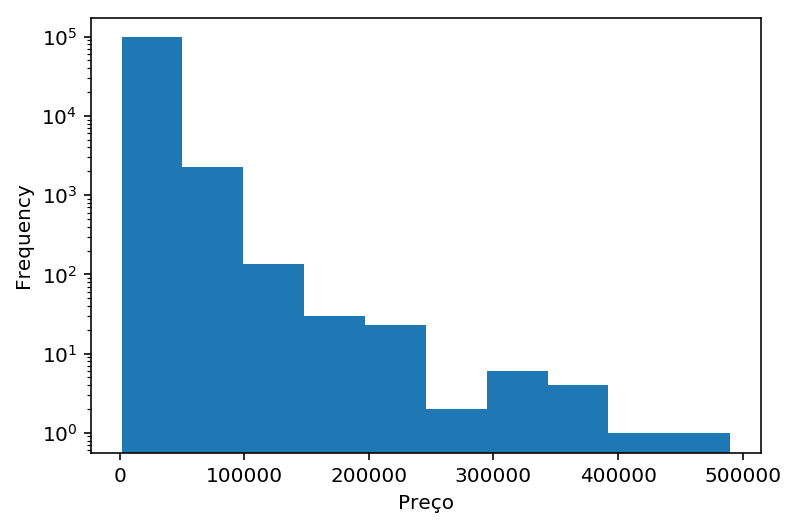

In [5]:
dataset["PRECO"].plot.hist(logy=True);
plt.xlabel("Preço");

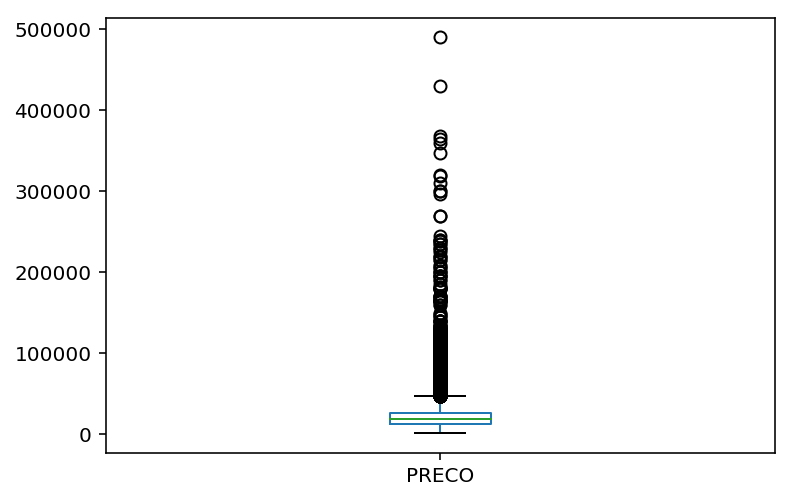

In [6]:
dataset["PRECO"].plot.box()
plt.show()

Análise:

A primeira variável 

**Características da variável Idade**

In [35]:
dataset["IDADE"].describe()

count    100000.00000
mean          5.69779
std           3.42296
min           1.00000
25%           3.00000
50%           5.00000
75%           7.00000
max          22.00000
Name: IDADE, dtype: float64

In [36]:
dataset["IDADE"].value_counts().head(5)

5.0    18361
4.0    18349
3.0    15428
2.0    11401
6.0     8837
Name: IDADE, dtype: int64

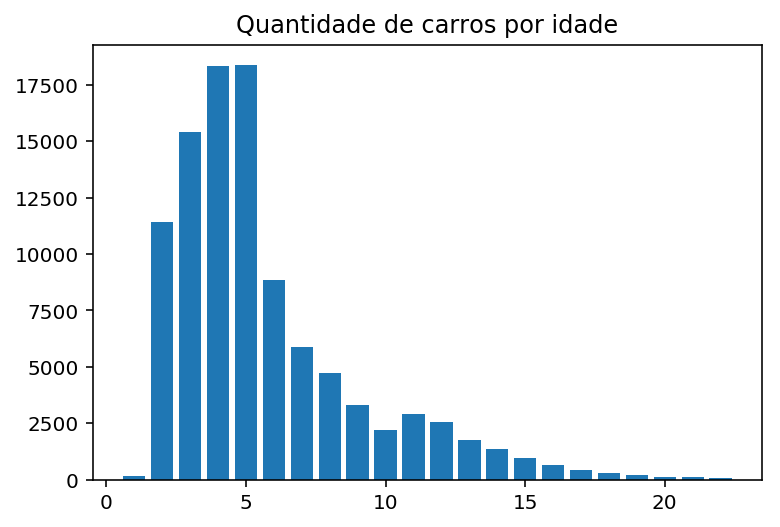

In [37]:
quantidade_por_idade = []
for i in range(22):
    quantidade_por_idade.append(len(dataset["IDADE"].loc[dataset["IDADE"] == i+1]))


plt.bar(np.arange(1,23,1), quantidade_por_idade)
plt.title("Quantidade de carros por idade")
plt.show()

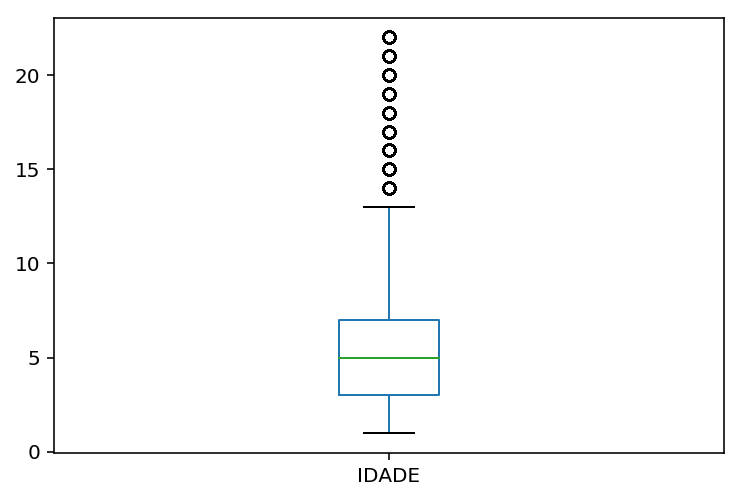

In [38]:
dataset["IDADE"].plot.box()
plt.show()

Análise:

A terceira variável analisada é a idade. Esta é a diferença entre o ano de hoje (2019), para o ano em que o carro foi fabricado. Após as plotagens do histograma e do boxplot, nota-se a grande maioria dos carros foi tem até 5 anos de idade, ou seja, a maioria deles são carros "jovens". Esta informação é confirmada pelo boxplot. Entretanto, existem alguns outliers, que ficam evidenciados em ambos os gráficos. Eles mostram que varios carros têm mais do que 5 anos de idade.

**Características da variável Km**

In [11]:
dataset["KM"].describe()

count    1.000000e+05
mean     8.476878e+04
std      6.714934e+04
min      8.000000e+00
25%      3.880480e+04
50%      6.520800e+04
75%      1.163572e+05
max      3.125600e+06
Name: KM, dtype: float64

(-10000, 400000)

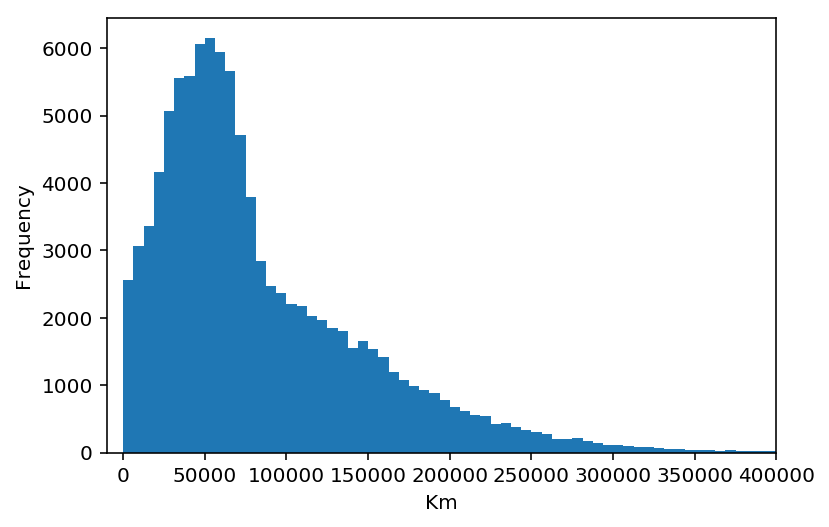

In [12]:
dataset["KM"].plot.hist(bins=500);
plt.xlabel("Km");
plt.xlim(-10000,400000)

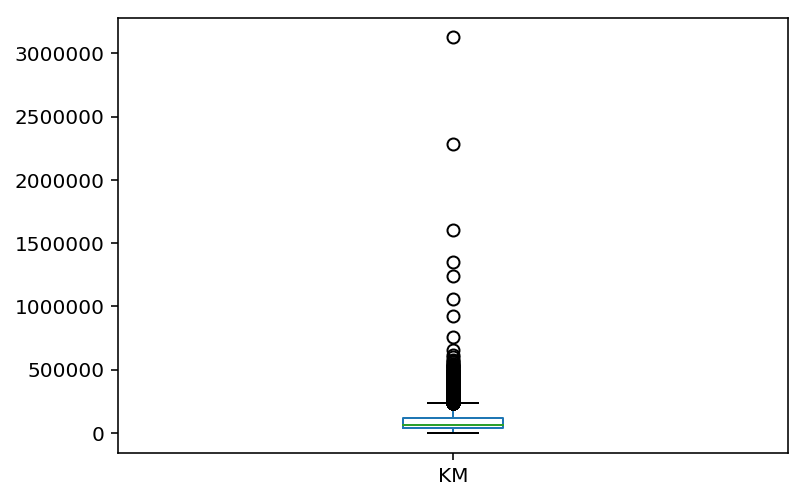

In [13]:
dataset["KM"].plot.box()
plt.show()

Análise:

A próxima variavel analisada é a quilometragem, ou seja, quantos quilometros os carros ja rodaram. Pelo fato de a maioria dos carros terem sido fabricados há menos de 10 anos, imagina-se que em sua maioria, os carros não tenham quilometragem alta. Esta hipótese é confirmada pelos gráficos. Com a plotagem do histograma e do boxplot, percebe-se que a maioria dos carros tem 50000 km rodados, sendo que existem alguns com mais e outros com menos. Este já é um número considerável mas, como pode se ver no boxplot, existem carros com mais de 3 milhões de km rodados. Assim, 50000 parece um numero pequeno. Tambem fica claro pelo boxplot que existe uma quantidade consideravel de outliers. Mesmo assim, a concentração maior se encontra nos 50000 km. 

**Característica da variável Marca**

In [21]:
dataset["MARCA"].describe()

count     100000
unique        57
top         FORD
freq       15354
Name: MARCA, dtype: object

In [22]:
dataset["MARCA"].value_counts().head(10)

FORD             15354
CHEVROLET        14443
HONDA             7329
NISSAN            6821
JEEP              5748
HYUNDAI           5343
DODGE             4746
KIA               4217
GMC               4076
MERCEDES-BENZ     3633
Name: MARCA, dtype: int64

Análise:

Como é de se imaginar, o preço de um veículo é muito afetado pela sua marca. Por exemplo, uma Ferrari será muito mais cara do que a grande maioria dos carros da ford, por exemplo. Além disso, nota-se a partir da análise dos value counts feitos que existem muito mais carros de marcas popuares, justamente por que são mais baratos. 

**Característica da variável Modelo**

In [23]:
dataset["MODELO"].describe()

count        100000
unique         2153
top       Silverado
freq           3529
Name: MODELO, dtype: object

In [24]:
dataset["MODELO"].value_counts().head(10)

Silverado    3529
Grand        2347
Sierra       1562
Altima2.5    1476
Accord       1439
F-1504WD     1308
Wrangler     1123
Civic        1122
3            1098
Santa         945
Name: MODELO, dtype: int64

Análise:

A variável analisada é o modelo do carro. O modelo usará esta para prever o preço do carro usando a seguinte lógica: se um modelo encontra-se entre os mais comprados, provavelmente significa que é um dos mais baratos, por que, geralmente os carros mais vendidos são aqueles mais baratos.

### ANÁLISE DESCRITIVA

(-10000, 500000)

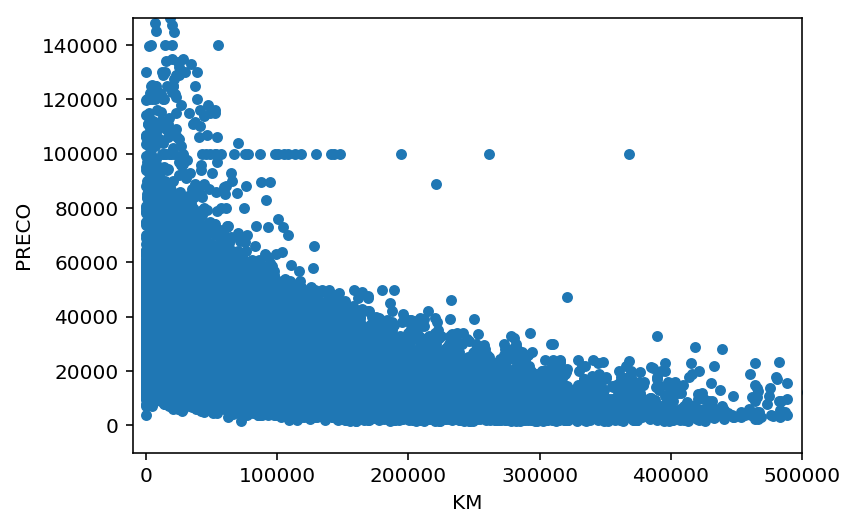

In [48]:
dataset.plot.scatter(y = "PRECO", x = "KM");
plt.ylim(-10000,150000)
plt.xlim(-10000,500000)

Analisando o gráfico Preço x Km, nota-se que o preço do veículo vai caindo conforme a quilometragem do mesmo aumenta, na maioria dos casos.

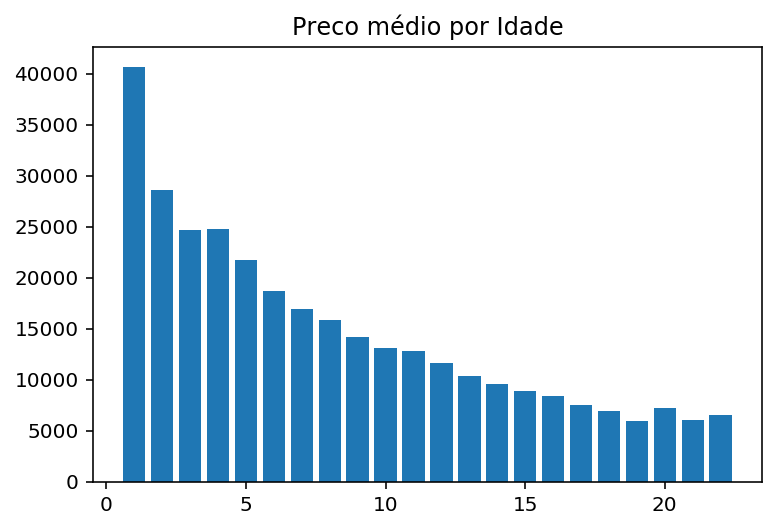

In [47]:
price_mean_by_year = []
for i in range(22):
    price_mean_by_year.append(dataset[dataset.IDADE == 1+i].PRECO.mean())
plt.bar(np.arange(1,23,1),price_mean_by_year)
plt.title("Preco médio por Idade")
plt.show()

Analisando o gráfico, é possível verificar que o preço dos carros diminui conforme o mesmo envelhece. Também é possível verificar que há queda mais efetiva no preço nos primeiros anos. 

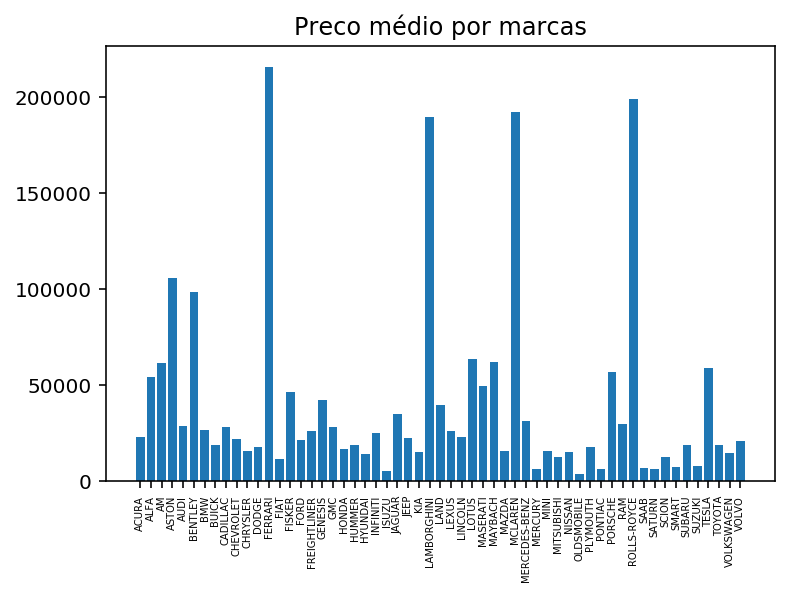

In [27]:
marcas = dataset["MARCA"].unique()

price_mean_by_marca = []
for i in marcas:
    price_mean_by_marca.append(dataset[dataset.MARCA == i].PRECO.mean())

plt.bar(marcas, price_mean_by_marca)
plt.xticks(rotation=90, fontsize=5)
plt.title("Preco médio por marcas")
plt.show()


O gráfico acima permite afirmar o que foi previsto na análise das informações do modelo do veículo. Como imaginado, o preço dos veículos aumenta conforme a marca. Por exemplo, as que têm os veículos mais caros são Rolss-Royce, Ferrari, Lambhorghini e Mercedes, justamente as marcas que esperava-se que teriam carros mais caros, por serem mais "famosas" por terem carros de alto nivel.

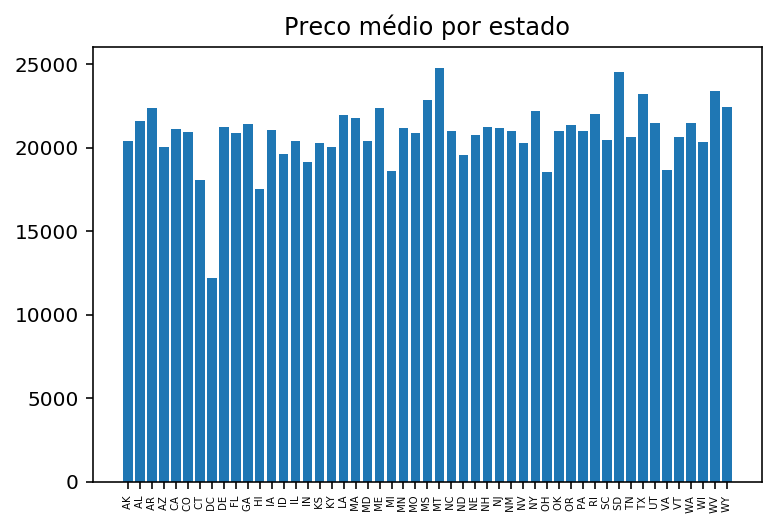

In [49]:
estados = dataset["ESTADO"].unique()

price_mean_by_estado = []
for i in estados:
    price_mean_by_estado.append(dataset[dataset.ESTADO == i].PRECO.mean())

plt.bar(estados, price_mean_by_estado)
plt.xticks(rotation=90, fontsize=5)
plt.title("Preco médio por estado")
plt.show()

___
## C. MODELOS DE PREDIÇÃO

o MODELO DE PREDIÇÃO PELA MÉDIA (Sem uso de variável explicativa).

**Separando a base de dados em treinamento e teste aleatoriamente**

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

___
## D. PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO

___
## E. CONCLUSÃO

___
## F. REFERÊNCIAS BIBLIOGRÁFICAS